In [ ]:
Name: TIBI ABDALLAH DAVID
Reg. No: SEP21/COMP/756S

<h2>Question Three</h2>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Read the Dataset

In [16]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepalLength\t,sepalWidth,petalLength,petalWidth,class,Unnamed: 5
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
2,4.7,3.2,1.3,0.2,setosa,NaN
3,4.6,3.1,1.5,0.2,setosa,NaN
4,5.0,3.6,1.4,0.2,setosa,NaN


In [17]:
iris.shape

(100, 6)

In [18]:
iris.drop('Unnamed: 5', axis=1, inplace=True)

In [19]:
iris.head()

,sepalLength\t,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
iris.shape

(100, 5)

In [21]:
iris['class'].value_counts()

versicolor    34
virginica     34
setosa        32
Name: class, dtype: int64

In [22]:
iris.columns

Index(['sepalLength\t', 'sepalWidth', 'petalLength', 'petalWidth', 'class'], dtype='object')

In [23]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepalLength	  100 non-null    float64
 1   sepalWidth    100 non-null    float64
 2   petalLength   100 non-null    float64
 3   petalWidth    100 non-null    float64
 4   class         100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [25]:
iris.describe(include='all')

,sepalLength\t,sepalWidth,petalLength,petalWidth,class
count,100.000000,100.000000,100.000000,100.00000,100
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,34
mean,5.914000,3.041000,3.851000,1.21300,NaN
std,0.856469,0.439489,1.785378,0.74558,NaN
min,4.300000,2.000000,1.000000,0.10000,NaN
25%,5.175000,2.800000,1.600000,0.37500,NaN
50%,5.850000,3.000000,4.500000,1.40000,NaN
75%,6.500000,3.300000,5.100000,1.80000,NaN


In [26]:
X=iris.iloc[:,:4]
X.head()

,sepalLength\t,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y=iris.iloc[:,-1]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: class, dtype: object

In [28]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.9552017 ,  1.04965641, -1.3797345 , -1.36551809],
       [-1.18989499, -0.09376016, -1.3797345 , -1.36551809],
       [-1.42458828,  0.36360647, -1.43602722, -1.36551809],
       [-1.54193493,  0.13492316, -1.32344179, -1.36551809]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
y_test.shape

(30,)

In [30]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)
y_predict1=knnmodel.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
acc=accuracy_score(y_test,y_predict1)
acc

0.9333333333333333

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, y_predict1)
cm

array([[ 6,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 10]], dtype=int64)

In [34]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,12,1
virginica,0,1,10


In [35]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [36]:
prediction_output.transpose()

,y_test,y_predict1
0,virginica,virginica
1,virginica,virginica
2,versicolor,versicolor
3,virginica,virginica
4,virginica,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,virginica,virginica
9,versicolor,virginica


In [37]:
prediction_output.iloc[0,:].value_counts()

versicolor    13
virginica     11
setosa         6
Name: y_test, dtype: int64

In [38]:
Ks=21
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))

In [39]:
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [40]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax(-1))

The best accuracy was with 1.0 with k= 10


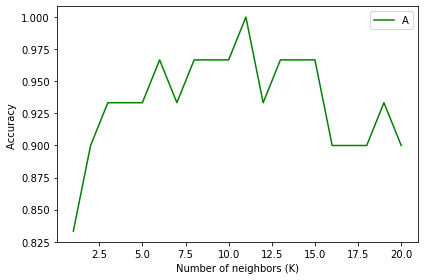

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()

<h2>Question Five</h2>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [45]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [47]:
df=pd.DataFrame(iris.data)
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [48]:
df.columns=iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [50]:
X=iris.data
Y=iris.target
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [51]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.25,random_state=2)

In [52]:
lorg=LogisticRegression(random_state=0)
lorg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [53]:
Y_pred=lorg.predict(X_test)
print(Y_pred)


[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_test))

1.0


<h2>Question Four</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris_df = pd.read_csv('iris.csv')
iris_df.tail()
iris_df.shape
iris_df.size
iris_df.count()
iris_df['sepalWidth'].value_counts()

In [ ]:
benign_df = iris_df[iris_df'class]==3.0][0:200]
malignant_df = iris_df[iris_df'class]==2.8][0:200]

axes = benign_df.plot(kind='scatter', x='sepalWidth', y='petalWidth', color='blue', label='Benign')

                       

In [ ]:
iris_df = pd.read_csv('iris.csv')
iris_df.tail()
iris_df.shape
iris_df.size
iris_df.count() 
iris_df['class'].value_counts()

<h2>Question One</h2>

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
covid=pd.read_csv('covid.csv')
covid.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,03/01/2020,AF,Afghanistan,EMRO,0,0,0,0
1,04/01/2020,AF,Afghanistan,EMRO,0,0,0,0
2,05/01/2020,AF,Afghanistan,EMRO,0,0,0,0
3,06/01/2020,AF,Afghanistan,EMRO,0,0,0,0
4,07/01/2020,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
covid=pd.read_csv('covid.csv')
covid.tail(8)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
167314,01/12/2021,ZW,Zimbabwe,AFRO,426,134652,1,4707
167315,02/12/2021,ZW,Zimbabwe,AFRO,685,135337,0,4707
167316,03/12/2021,ZW,Zimbabwe,AFRO,1042,136379,0,4707
167317,04/12/2021,ZW,Zimbabwe,AFRO,1062,137441,1,4708
167318,05/12/2021,ZW,Zimbabwe,AFRO,1082,138523,1,4709
167319,06/12/2021,ZW,Zimbabwe,AFRO,523,139046,1,4710
167320,07/12/2021,ZW,Zimbabwe,AFRO,0,139046,0,4710
167321,08/12/2021,ZW,Zimbabwe,AFRO,6586,145632,8,4718


In [7]:
print(covid)

       Date_reported Country_code      Country WHO_region  New_cases  \
0         03/01/2020           AF  Afghanistan       EMRO          0   
1         04/01/2020           AF  Afghanistan       EMRO          0   
2         05/01/2020           AF  Afghanistan       EMRO          0   
3         06/01/2020           AF  Afghanistan       EMRO          0   
4         07/01/2020           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
167317    04/12/2021           ZW     Zimbabwe       AFRO       1062   
167318    05/12/2021           ZW     Zimbabwe       AFRO       1082   
167319    06/12/2021           ZW     Zimbabwe       AFRO        523   
167320    07/12/2021           ZW     Zimbabwe       AFRO          0   
167321    08/12/2021           ZW     Zimbabwe       AFRO       6586   

        Cumulative_cases  New_deaths  Cumulative_deaths  
0                      0           0                  0  
1                  

In [8]:
covid['Cumulative_cases'] = covid['Cumulative_cases'].fillna(covid['Cumulative_cases'].mean())

In [11]:
print(covid)

       Date_reported Country_code      Country WHO_region  New_cases  \
0         03/01/2020           AF  Afghanistan       EMRO          0   
1         04/01/2020           AF  Afghanistan       EMRO          0   
2         05/01/2020           AF  Afghanistan       EMRO          0   
3         06/01/2020           AF  Afghanistan       EMRO          0   
4         07/01/2020           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
167317    04/12/2021           ZW     Zimbabwe       AFRO       1062   
167318    05/12/2021           ZW     Zimbabwe       AFRO       1082   
167319    06/12/2021           ZW     Zimbabwe       AFRO        523   
167320    07/12/2021           ZW     Zimbabwe       AFRO          0   
167321    08/12/2021           ZW     Zimbabwe       AFRO       6586   

        Cumulative_cases  New_deaths  Cumulative_deaths  
0                      0           0                  0  
1                  

In [12]:
covid['Cumulative_deaths'] = covid['Cumulative_deaths'].fillna(covid['Cumulative_deaths'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167322 entries, 0 to 167321
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      167322 non-null  object
 1   Country_code       166616 non-null  object
 2   Country            167322 non-null  object
 3   WHO_region         167322 non-null  object
 4   New_cases          167322 non-null  int64 
 5   Cumulative_cases   167322 non-null  int64 
 6   New_deaths         167322 non-null  int64 
 7   Cumulative_deaths  167322 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 10.2+ MB


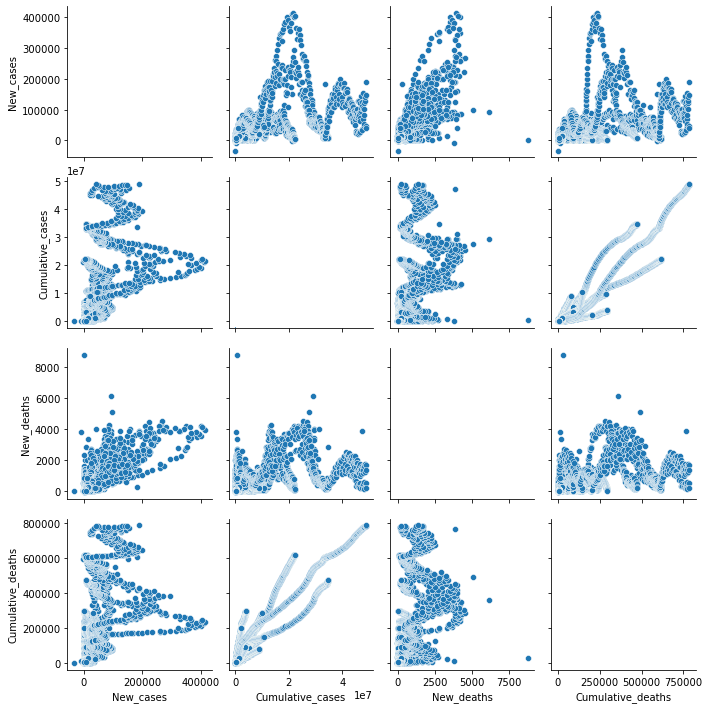

In [13]:
covid.head()
covid.info()
covid.describe()
covid.columns
sns.pairplot(covid)

In [ ]:
X = covid[[‘Date_reported’, ‘Cumulative_deaths’]]
y = covid[‘New_cases’]
X[‘Date_reported’] = pd.to_datetime(X[‘Date’], format=’%d-%m-%y’)